# Data Wrangling Project


# Table of Contents

1 - [Gathering](#g)<br>
&emsp;1.1 - [Twitter Archive](#gArch)<br>
&emsp;1.2 - [Twitter API](#gApi)<br>
&emsp;1.3 - [Image Predictions File](#gPre)<br>
2 - [Accessing](#a)<br>
&emsp;2.1 - [Twitter Archive](#aArch)<br>
&emsp;2.2 - [Twitter API](#aApi)<br>
&emsp;2.3 - [Image Predictions File](#aPre)<br>
3 - [Cleaning](#c)<br>
&emsp;2.1 - [Twitter Archive](#cArch)<br>
&emsp;&emsp;2.1.01 - [Define Quality issue #1](#cArchdq1)<br>
&emsp;&emsp;2.1.02 - [Define Quality issue #2](#cArchdq2)<br>
&emsp;&emsp;2.1.03 - [Define Quality issue #3](#cArchdq3)<br>
&emsp;&emsp;2.1.04 - [Define Quality issue #4](#cArchdq4)<br>
&emsp;&emsp;2.1.05 - [Define Quality issue #5](#cArchdq5)<br>
&emsp;&emsp;2.1.06 - [Define Quality issue #6](#cArchdq6)<br>
&emsp;&emsp;2.1.07 - [Define Quality issue #7](#cArchdq7)<br>
&emsp;&emsp;2.1.08 - [Define Quality issue #8](#cArchdq8)<br>
&emsp;&emsp;2.1.09 - [Define Quality issue #9](#cArchdq9)<br>
&emsp;&emsp;2.1.10 - [Define Quality issue #10](#cArchdq10)<br>
&emsp;&emsp;2.1.11 - [Define Tidiness issue #1](#cArchdt1)<br>
&emsp;&emsp;2.1.12 - [Define Tidiness issue #2](#cArchdt2)<br>
&emsp;&emsp;2.1.13 - [Define Tidiness issue #3](#cArchdt3)<br>
&emsp;&emsp;2.1.14 - [Define Tidiness issue #4](#cArchdt4)<br>
&emsp;2.2 - [Twitter API](#cApi)<br>
&emsp;&emsp;2.2.1 - [Define Quality issue #1](#cApidq1)<br>
&emsp;&emsp;2.2.2 - [Define Tidiness issue #1](#cApidt1)<br>
&emsp;&emsp;2.2.3 - [Define Tidiness issue #2](#cApidt2)<br>
&emsp;2.3 - [Image Predictions File](#cPre)<br>
&emsp;&emsp;2.3.1 - [Define Quality issue #1](#cPredq1)<br>
&emsp;&emsp;2.3.2 - [Define Quality issue #2](#cPredq2)<br>
&emsp;&emsp;2.3.3 - [Define Quality issue #3](#cPredq3)<br>
&emsp;&emsp;2.3.4 - [Define Quality issue #4](#cPredq4)<br>
&emsp;&emsp;2.3.5 - [Define Quality issue #5](#cPredq5)<br>
&emsp;&emsp;2.3.6 - [Define Tidiness issue #1](#cPredt1)<br>
&emsp;&emsp;2.3.7 - [Define Tidiness issue #2](#cPredt2)<br>
4 - [Storing](#s)<br>
5 - [Analysis and visualization](#aav)<br>
&emsp;5.1 - [Insight #1](#aav1)<br>
&emsp;5.2 - [Insight #2](#aav2)<br>
&emsp;5.3 - [Insight #3](#aav3)<br>
&emsp;5.4 - [Insight #4](#aav4)<br>
&emsp;5.5 - [Insight #5](#aav5)<br>
&emsp;5.6 - [Insight #6](#aav6)<br>
&emsp;5.7 - [Insight #7](#aav7)<br>
&emsp;5.8 - [Insight #8](#aav8)<br>
&emsp;5.9 - [Insight #9](#aav9)<br>

<a id="g"></a>
# Gathering


In [2]:
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np
import re

<a id="gArch"></a>
### 1.Twitter Archive


In [3]:
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

<a id="gApi"></a>
### 2. Twitter API


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key    = '*****************************'
consumer_secret = '*****************************'
access_token    = '*****************************'
access_secret   = '*****************************'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
tweet_json_data = []
with open('tweet_json.txt') as json_file:  
    each_tweet = json_file.readline()
    while each_tweet:
        all_tweet_data = json.loads(each_tweet)
        tweet_id = all_tweet_data['id']
        whole_tweet = all_tweet_data['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = all_tweet_data['favorite_count']
        retweet_count = all_tweet_data['retweet_count']
        followers_count = all_tweet_data['user']['followers_count']
        friends_count = all_tweet_data['user']['friends_count']
        whole_source = all_tweet_data['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = all_tweet_data['retweeted_status'] = all_tweet_data.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

            
        
        tweet_json_data.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        
        each_tweet = json_file.readline()
api_df = pd.DataFrame(tweet_json_data, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url']) 

<a id="gPre"></a>
### 3. Image Predictions File


In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
content = response.content
file_name = url.split("/")[-1]
if not os.path.isfile(file_name):
    with open(file_name,mode="wb") as file:
        file.write(content)


In [6]:
image_predictions_df = pd.read_csv(file_name,sep="\t")

<a id="a"></a>
# Assessing


<a id="aArch"></a>
### 1. Twitter Archive


In [7]:
archive_df.shape

(2356, 17)

In [8]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2087,670797304698376195,NaN,NaN,2015-11-29 02:51:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
696,786664955043049472,NaN,NaN,2016-10-13 20:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,12,10,None,None,None,None,None
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None
1523,690607260360429569,6.903413e+17,467036706.0,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
523,809448704142938112,NaN,NaN,2016-12-15 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I call this one ""A Blep by the Sea"" 12/10 http...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809448704...,12,10,None,None,None,None,None


In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Jarod        1
Aqua         1
Tove         1
Dante        1
Corey        1
Name: name, Length: 957, dtype: int64

In [20]:
lowercase_names = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[lowercase_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [21]:
archive_df.name.str.contains('^[a-z]', regex = True).value_counts()

False    2247
True      109
Name: name, dtype: int64

In [22]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
archive_df.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

### Quality

01 - There are 181 retweets. <br>
02 - There are 78 tweet replies.<br>
03 - The **timestamp** column is in `object` format.<br>
04 - There is unwanted html tag `a` in the source column.<br>
05 - There are 109 tweets in the **name** column that with invalid names.<br>
06 - The **tweet_id** column is in an `int64` datatype.<br>
07 - There are missing data in **expanded_urls** column.<br>
08 - There are 137 duplicated rows in  **expanded_urls** column.<br>
09 - The **rating_numerator** and **rating_denominator** are in `int64` data type. <br>
10 - The names of columns are not explanatory.<br>

### Tidiness

01 - There is one column for date and time in **timestamp** column.<br>
02 - There are 4 columns for dog classifications (**doggo**, **floofer**, **pupper**, **puppo**).<br>
03 - Add **dog_rating** column using **rating_numerator** and **rating_denominator** columns.<br>
04 - Not all columns are needed (**retweeted_status_timestamp**, **retweeted_status_user_id**, **retweeted_status_id**,**source**,**in_reply_to_status_id**,**in_reply_to_user_id**,**expanded_urls**).


<a id="aApi"></a>
### 2. Twitter API


In [24]:
api_df.shape

(2354, 8)

In [25]:
api_df.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,39467,8853,3200889,104,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,3200889,104,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,3200889,104,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,3200889,104,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,3200889,104,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f


In [26]:
api_df.tail()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2349,666049248165822465,111,41,3201018,104,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,311,147,3201018,104,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,128,47,3201018,104,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,132,48,3201018,104,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2353,666020888022790149,2535,532,3201018,104,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


In [27]:
api_df.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1448,695816827381944320,3287,1320,3200950,104,Twitter for iPhone,Original tweet,https://t.co/VsQdLxrv9h
1181,718939241951195136,5720,1973,3200944,104,Twitter for iPhone,Original tweet,https://t.co/I9qoe1uEih
1811,676776431406465024,5405,2249,3201001,104,Twitter for iPhone,Original tweet,https://t.co/4rMZi5Ca1k
1585,686749460672679938,3812,1666,3200950,104,Twitter for iPhone,Original tweet,https://t.co/nSQrhwbk1V
1224,713919462244790272,3564,869,3200947,104,Twitter for iPhone,Original tweet,https://t.co/7vyAzIURrE


In [27]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   object
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(4), object(4)
memory usage: 147.2+ KB


In [28]:
api_df.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2354.000000,2354.000000,2.354000e+03,2354.0
mean,8080.968564,3164.797366,3.200942e+06,104.0
std,11814.771334,5284.770364,4.457302e+01,0.0
min,0.000000,0.000000,3.200799e+06,104.0
25%,1415.000000,624.500000,3.200898e+06,104.0
50%,3603.500000,1473.500000,3.200945e+06,104.0
75%,10122.250000,3652.000000,3.200953e+06,104.0
max,132810.000000,79515.000000,3.201018e+06,104.0


In [29]:
api_df.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count', 'source', 'retweeted_status', 'url'],
      dtype='object')

In [30]:
api_df.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
friends_count       0
source              0
retweeted_status    0
url                 0
dtype: int64

In [31]:
api_df.retweeted_status.value_counts()

Original tweet       2175
This is a retweet     179
Name: retweeted_status, dtype: int64

### Quality

01 - There are 179 retweets.<br>

### Tidiness

01 - Not all columns are needed.<br>
02 - There are 2 tables (`api_df` and `archive_df` ).


### 3. Image Predictions File
<a id="aPre"></a>

In [32]:
image_predictions_df.shape

(2075, 12)

In [33]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1165,735274964362878976,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1,studio_couch,0.944692,False,four-poster,0.007942,False,quilt,0.006302,False
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
1966,867774946302451713,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,2,Border_collie,0.661953,True,Cardigan,0.175718,True,collie,0.087142,True


In [36]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [39]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [40]:
image_predictions_df.jpg_url.duplicated().sum()

66

In [41]:
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Quality

01 - There are 543 rows with value `False` in **p1_dog** column.<br>
02 - There are 66 **jpg_url** duplicated.<br>
03 - The **tweet_id** is in `integer` data type.<br>
04 - The **jpg_url** column name is not descriptive.<br>
05 - There are duplicated rows comes from merging tables.

### Tidiness


01 - Not all columns are needed (**p1_dog**,**p2_dog**,**p3_dog**).<br>
02 - There are 2 tables `api` and `image_predictions`.

<a id="c"></a>
# Cleaning


<a id="cArch"></a>
# 1.Twitter Archive


In [42]:
archive_clean = archive_df.copy()

<a id="cArchdq1"></a>
### Define Quality issue #1

    Drop all 181 rows containing retweets: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [43]:
archive_clean = archive_clean[np.isnan(archive_clean.retweeted_status_id)]

#### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<a id="cArchdq2"></a>
### Define Quality issue #2

    Drop all 78 rows that are replies: 
    in_reply_to_status_id and in_reply_to_user_id.

#### Code

In [45]:
archive_clean = archive_clean[np.isnan(archive_clean.in_reply_to_status_id)]

#### Test

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

<a id="cArchdq3"></a>
### Define Quality issue #3

    Convert timestamp to datetime data type.

#### Code

In [47]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

<a id="cArchdq4"></a>
### Define Quality issue #4

    Extract the string between <a href=""> and </a> in source column.

#### Code

In [49]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [50]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

<a id="cArchdq5"></a>
### Define Quality issue #5
    
    Replace all invalid words for 109 tweets:
    if text column is contain named and name is get the word appears after that and none for none defined.

#### Code

In [51]:
# name is lowercase and 'text' column contains 'named' 
a_replace = archive_clean.loc[(archive_clean['name'].str.islower()) & (archive_clean['text'].str.contains('named'))]
# name is lowercase and 'text' column contains 'name is'
b_replace = archive_clean.loc[(archive_clean['name'].str.islower()) & (archive_clean['text'].str.contains('name is'))]
# all lowercase 
c_replace = archive_clean.loc[(archive_clean['name'].str.islower())]

# Save these locations as lists
a_replace_list = a_replace['text'].tolist()
b_replace_list = b_replace['text'].tolist()
c_replace_list = c_replace['text'].tolist()

# Iterate through locations and set the 'name' to be the word that appears after 'named'
for entry in a_replace_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# Iterate through locations and set the 'name' value to be the word that appears after 'name is'    
for entry in b_replace_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# Iterate through locations replace the name value with the word "None"
for entry in c_replace_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = "None"

#### Test

In [52]:
archive_clean[lowercase_names].name.value_counts().sort_index()

<ipython-input-52-f0b304c3b9e3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  archive_clean[lowercase_names].name.value_counts().sort_index()


None    104
Name: name, dtype: int64

<a id="cArchdq6"></a>
### Define Quality issue #6

    Convert tweet_id column to object data type.

#### Code

In [53]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

#### Test

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

<a id="cArchdq7"></a>
### Define Quality issue #7
    
    Use tweet_id to get missing rows in expanded_urls column.

#### Code

In [55]:
archive_clean['expanded_urls'] = 'https://twitter.com/dog_rates/status/'+ archive_clean['tweet_id']

#### Test

In [56]:
archive_clean.expanded_urls.isnull().sum()

0

<a id="cArchdq8"></a>
### Define Quality issue #8
    
    Remove all duplicated rows in expanded_urls column.

#### Code

In [57]:
archive_clean.drop_duplicates(subset=['expanded_urls'],keep=False,inplace=True)

#### Test

In [58]:
archive_clean.expanded_urls.duplicated().value_counts()

False    2097
Name: expanded_urls, dtype: int64

<a id="cArchdq9"></a>
### Define Quality issue #9

    Convert rating_numerator and rating_denominator to float data type.

#### Code

In [59]:
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2097 non-null   object             
 10  rating_numerator            2097 non-null   float64         

<a id="cArchdq10"></a>
### Define Quality issue #10

    Rename columns text and name columns with tweet_text and dog_name.

#### Code

In [61]:
archive_clean.rename(columns={'timestamp': 'tweet_time','text': 'tweet_text', 'source': 'tweet_source','expanded_urls': 'tweet_url', 'name': 'dog_name'}, inplace=True)

#### Test

In [62]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_time', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

<a id="cArchdt1"></a>
### Define Tidiness issue #1
    
    Extract year, month and day to new columns.

#### Code

In [63]:
archive_clean['tweet_year'] = archive_clean['tweet_time'].dt.year
archive_clean['tweet_month'] = archive_clean['tweet_time'].dt.month
archive_clean['tweet_day'] = archive_clean['tweet_time'].dt.day

#### Test

In [64]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_time', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo', 'tweet_year', 'tweet_month', 'tweet_day'],
      dtype='object')

<a id="cArchdt2"></a>
### Define Tidiness issue #2

    Calculate rating of dog by dividing rating_numerator column over rating_denominator column. 

#### Code

In [65]:
archive_clean['dog_rating'] =  archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)

#### Test

In [66]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_time,tweet_source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_url,...,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_year,tweet_month,tweet_day,dog_rating
2045,671528761649688577,NaN,NaN,2015-12-01 03:18:27+00:00,Twitter for iPhone,Meet Jax. He's in the middle of a serious conv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671528761...,...,10.0,Jax,None,None,None,None,2015,12,1,1.0
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26+00:00,Twitter for iPhone,This is Astrid. She's a guide doggo in trainin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829374341...,...,10.0,Astrid,doggo,None,None,None,2017,2,8,1.3
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09+00:00,Twitter for iPhone,Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,...,10.0,Charlie,None,None,None,None,2017,2,20,1.3
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59+00:00,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,...,40.0,None,None,None,None,None,2016,2,10,1.1
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01+00:00,Twitter for iPhone,Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,...,10.0,None,None,None,None,None,2015,12,25,1.1


<a id="cArchdt3"></a>
### Define Tidiness issue #3

    Combine doggo,floofer,pupper,puppo in one column dog_classification.

#### Code

In [67]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'tweet_time',
       'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'tweet_year', 'tweet_month', 'tweet_day','dog_rating'],
        value_vars=['doggo','floofer', 'pupper', 'puppo'],
        var_name ='dogs', value_name ='dog_classification')

#### Test

In [68]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_time', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'tweet_year',
       'tweet_month', 'tweet_day', 'dog_rating', 'dogs', 'dog_classification'],
      dtype='object')

<a id="cArchdt4"></a>
### Define Tidiness issue #4

    Remove all unwanted columns (retweeted_status_timestamp,retweeted_status_user_id,retweeted_status_id,
    in_reply_to_status_id,dogs,in_reply_to_user_id) columns.

#### Code

In [69]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'dogs']
                                   , axis = 1)

#### Test

In [70]:
archive_clean

,tweet_id,tweet_time,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,tweet_year,tweet_month,tweet_day,dog_rating,dog_classification
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017,8,1,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017,8,1,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017,7,31,1.2,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017,7,30,1.3,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017,7,29,1.2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,2015,11,16,0.5,None
8384,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,2015,11,16,0.6,None
8385,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,2015,11,15,0.9,None
8386,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,2015,11,15,0.7,None


<a id="cApi"></a>
# 2.Twitter Api


In [71]:
api_clean = api_df.copy()

<a id="cApidq1"></a>
### Define Quality Issue#1

    Get all Original tweets from the table

#### Code

In [72]:
api_clean = api_clean[api_clean['retweeted_status'] == "Original tweet"]

#### Test

In [73]:
api_clean[api_clean['retweeted_status'] != "Original tweet"]

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url


<a id="cApidt1"></a>
### Define Tidiness issue #1

    Remove unwanted columns.

#### Code

In [74]:
api_clean = api_clean.drop(['source','url','retweeted_status'], axis = 1)

#### Test

In [75]:
api_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count'],
      dtype='object')

<a id="cApidt2"></a>
### Define Tidiness issue #2

    combine archive and api tables

#### Code

In [76]:
api_clean = pd.merge(archive_clean, api_clean, on = 'tweet_id', how = 'left')

#### Test

In [77]:
api_clean

,tweet_id,tweet_time,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,tweet_year,tweet_month,tweet_day,dog_rating,dog_classification,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017,8,1,1.3,None,39467,8853,3200889,104
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017,8,1,1.3,None,33819,6514,3200889,104
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017,7,31,1.2,None,25461,4328,3200889,104
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017,7,30,1.3,None,42908,8964,3200889,104
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017,7,29,1.2,None,41048,9774,3200889,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,2015,11,16,0.5,None,111,41,3201018,104
8384,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,2015,11,16,0.6,None,311,147,3201018,104
8385,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,2015,11,15,0.9,None,128,47,3201018,104
8386,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,2015,11,15,0.7,None,132,48,3201018,104


# 3. Image Predictions File
<a id="cPre"></a>

In [78]:
image_predictions_clean = image_predictions_df.copy()

<a id="cPredq1"></a>
### Define Quality issue #1

    Remove rows which it's value is equal False from the p1_dog column.

#### Code

In [79]:
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean.p1_dog == False].index, inplace=True)

#### Test

In [80]:
image_predictions_clean[image_predictions_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<a id="cPredt1"></a>
### Define Tidiness issue #1


    Remove unwanted columns.

#### Code

In [81]:
image_predictions_clean.drop(['img_num','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf'], axis=1, inplace=True)

#### Test

In [82]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf'], dtype='object')

<a id="cPredq2"></a>
### Define Quality issue #2

    Remove dublicated rows in jpg_url.

#### Code

In [83]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'])

#### Test

In [84]:
image_predictions_clean['jpg_url'].duplicated().sum()

0

<a id="cPredq3"></a>
### Define Quality issue #3

    Convert tweet_id to object data type.

#### Code

In [85]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

#### Test

In [86]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1480 non-null   object 
 1   jpg_url   1480 non-null   object 
 2   p1        1480 non-null   object 
 3   p1_conf   1480 non-null   float64
dtypes: float64(1), object(3)
memory usage: 57.8+ KB


<a id="cPredq4"></a>
### Define Quality issue #4

    Rename jpg_url column with dog_img_url , p1 column with dog_breed_prediction and p1_conf column with 
    prediction_confidence.

#### Code

In [87]:
image_predictions_clean.rename(columns={'jpg_url': 'dog_img_url','p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}, inplace=True)

#### Test

In [88]:
image_predictions_clean.columns

Index(['tweet_id', 'dog_img_url', 'dog_breed_prediction',
       'prediction_confidence'],
      dtype='object')

<a id="cPredt2"></a>
### Define Tidiness issue #2

    Combine all tables together.

#### Code

In [89]:
image_predictions_clean = pd.merge(api_clean, image_predictions_clean,
                        how = 'inner', on = 'tweet_id')

#### Test

In [91]:
image_predictions_clean.sample(5)

,tweet_id,tweet_time,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,tweet_year,tweet_month,tweet_day,dog_rating,dog_classification,favorite_count,retweet_count,followers_count,friends_count,dog_img_url,dog_breed_prediction,prediction_confidence
3535,697596423848730625,2016-02-11 01:42:02+00:00,Twitter for iPhone,Here's a pupper with a piece of pizza. Two of ...,https://twitter.com/dog_rates/status/697596423...,11.0,10.0,None,2016,2,11,1.1,None,3306,1425,3200950,104,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,Shetland_sheepdog,0.621668
3361,701952816642965504,2016-02-23 02:12:47+00:00,Twitter for iPhone,Meet Rilo. He's a Northern Curly Ticonderoga. ...,https://twitter.com/dog_rates/status/701952816...,11.0,10.0,Rilo,2016,2,23,1.1,None,4167,1149,3200950,104,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,toy_poodle,0.331707
3798,689623661272240129,2016-01-20 01:41:08+00:00,Twitter for iPhone,This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10.0,10.0,Lucy,2016,1,20,1.0,pupper,2467,748,3200859,104,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,toy_poodle,0.279604
161,882627270321602560,2017-07-05 15:48:34+00:00,Twitter for iPhone,This is Stanley. He has his first swim lesson ...,https://twitter.com/dog_rates/status/882627270...,13.0,10.0,Stanley,2017,7,5,1.3,None,28382,6342,3200890,104,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,Pembroke,0.542982
5159,670807719151067136,2015-11-29 03:33:17+00:00,Twitter for iPhone,"Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11.0,10.0,Andy,2015,11,29,1.1,None,1234,546,3201008,104,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,Old_English_sheepdog,0.958035


<a id="cPredq5"></a>
### Define Quality issue #5

    Remove duplicated rows.

#### Code

In [92]:
image_predictions_clean = image_predictions_clean.drop_duplicates()

#### Test

In [93]:
image_predictions_clean.duplicated().sum()

0

<a id="s"></a>
# Storing

In [94]:
image_predictions_clean.to_csv('twitter_archive_master.csv', index=False)

<a id="aav"></a>
# Analyzing and Visualizing

In [95]:
df = pd.read_csv('twitter_archive_master.csv')

<a id="aav1"></a>
## Insight #1

#### The `golden_retriever` dog type is the most common dog that has been rated.

In [96]:
df['dog_breed_prediction'].value_counts()

golden_retriever      173
Labrador_retriever    109
Pembroke              101
Chihuahua              85
pug                    62
                     ... 
EntleBucher             1
silky_terrier           1
Japanese_spaniel        1
Scotch_terrier          1
groenendael             1
Name: dog_breed_prediction, Length: 111, dtype: int64

<a id="v1"></a>
### Visualization

Text(0, 0.5, 'Dog Classification')

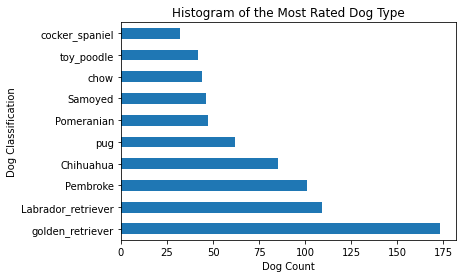

In [97]:
df_dog_type = df.groupby('dog_breed_prediction').filter(lambda x: len(x) >= 25)

df_dog_type['dog_breed_prediction'].value_counts()[:10].plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Dog Count')
plt.ylabel('Dog Classification')

<a id="aav2"></a>
## Insight #2

In [98]:
df_dog_type_mean = df.groupby('dog_breed_prediction').mean()

In [99]:
df_dog_type_mean

,tweet_id,rating_numerator,rating_denominator,tweet_year,tweet_month,tweet_day,dog_rating,favorite_count,retweet_count,followers_count,friends_count,prediction_confidence
dog_breed_prediction,,,,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,2016.333333,7.666667,11.000000,0.966667,17326.666667,5976.000000,3.200898e+06,104.0,0.433959
Airedale,7.213587e+17,9.846154,10.0,2015.615385,8.615385,16.307692,0.984615,5421.846154,1420.230769,3.200955e+06,104.0,0.585247
American_Staffordshire_terrier,7.551874e+17,11.125000,10.0,2016.125000,5.625000,13.875000,1.112500,7664.125000,2257.500000,3.200930e+06,104.0,0.657597
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,1.100000,7317.500000,1458.000000,3.200920e+06,104.0,0.503665
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,1.150000,11127.500000,3078.500000,3.200920e+06,104.0,0.307584
...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,7.123279e+17,11.023810,10.0,2015.642857,7.523810,14.547619,1.102381,6715.547619,2452.404762,3.200954e+06,104.0,0.627455
toy_terrier,7.397428e+17,11.000000,10.0,2015.500000,11.500000,21.000000,1.100000,4497.000000,1162.000000,3.200956e+06,104.0,0.463040
vizsla,7.564165e+17,10.928571,10.0,2015.857143,8.857143,17.142857,1.092857,7490.642857,1969.571429,3.200940e+06,104.0,0.658112


In [100]:
df_dog_type_sorted = df_dog_type_mean['dog_rating'].sort_values()

In [101]:
df_dog_type_sorted

dog_breed_prediction
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.870000
Ibizan_hound                   0.900000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
                                 ...   
Tibetan_mastiff                1.240000
briard                         1.240000
Saluki                         1.250000
Pomeranian                     1.259574
clumber                        2.700000
Name: dog_rating, Length: 111, dtype: float64

#### `Japanese_spaniel` has the lowest average rating.
#### `Clumber` has the highest average rating.

<a id="aav3"></a>
## Insight #3

#### The highest ratings do not receive the most retweets.

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

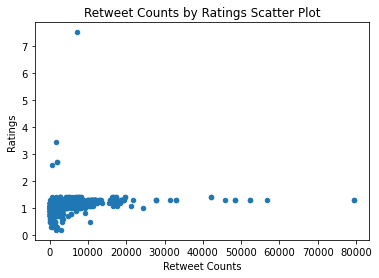

In [102]:
df.plot(x='retweet_count', y='dog_rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

<a id="aav4"></a>
## Insight #4


#### There is a correlation between the number of tweets and the number of favourites it gets.

Text(0.5, 1.0, 'Scatter plot of retweets and scatter plot')

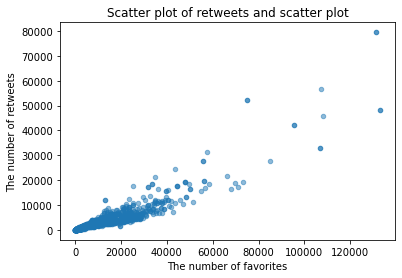

In [103]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('The number of favorites')
plt.ylabel('The number of retweets')
plt.title('Scatter plot of retweets and scatter plot')

<a id="aav5"></a>
## Insight #5

    The Most Rated Dog Type 


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, 'miniature_schnauzer'),
  Text(0.0, 0, 'golden_retriever'),
  Text(20.0, 0, 'Maltese_dog'),
  Text(40.0, 0, 'Blenheim_spaniel'),
  Text(60.0, 0, 'Border_terrier'),
  Text(80.0, 0, 'keeshond'),
  Text(100.0, 0, 'toy_terrier'),
  Text(120.0, 0, '')])

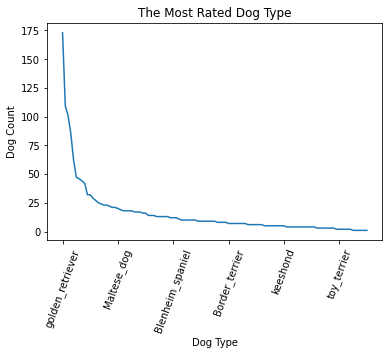

In [104]:
df['dog_breed_prediction'].value_counts().plot()
plt.title('The Most Rated Dog Type')
plt.xlabel('Dog Type')
plt.ylabel('Dog Count')
degrees = 70
plt.xticks(rotation = degrees)

<a id="aav6"></a>
## Insight #6
    Retweet Counts by Ratings Scatter Plot

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

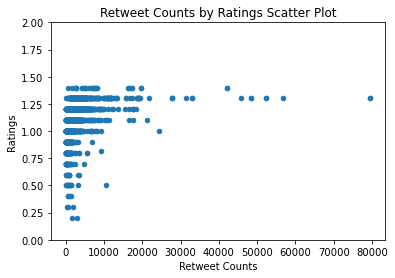

In [115]:
df.plot(x='retweet_count', y='dog_rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')

plt.ylim(0,2)
plt.title('Retweet Counts by Ratings Scatter Plot')

<a id="aav7"></a>
## Insight #7
    Rating over time

<function matplotlib.pyplot.show(close=None, block=None)>

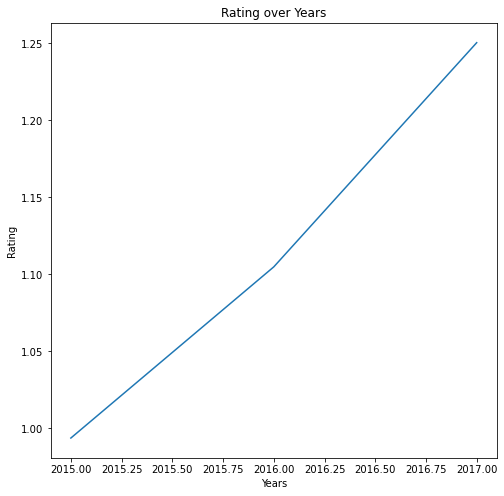

In [106]:
df.groupby('tweet_year')['dog_rating'].mean().plot(kind='line',figsize=(8,8))
plt.title('Rating over Years')
plt.xlabel('Years')
plt.ylabel('Rating')
plt.show

<a id="aav8"></a>
## Insight #8
    Popular dog classification

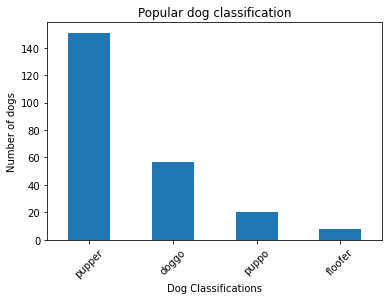

In [107]:
df[df['dog_classification'] != "None"].dog_classification.value_counts().sort_values(ascending=False).plot.bar()
plt.title("Popular dog classification")
plt.xticks(rotation=45)
plt.xlabel("Dog Classifications")
plt.ylabel("Number of dogs");


<a id="aav9"></a>
## Insight #9
    Retweet Counts by Ratings Scatter Plot

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

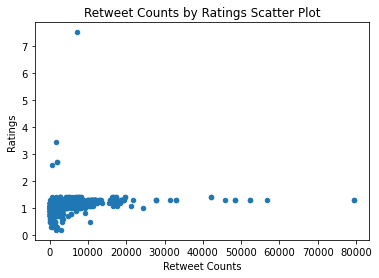

In [108]:
df.plot(x='retweet_count', y='dog_rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')